# For this file, the main goal is to make our data in generalizable format and test different models on it

In [24]:
import pandas as pd
import raw_to_def as rtd
import os
# let us test set b
train_path = '../data/dataset/set-a'
train_label_path = '../data/dataset/Outcomes-a.txt'

files = [f for f in os.listdir(train_path) if f.endswith(".txt")]
files.sort()

patient_data =[]
patient_outcomes =[]

for i in enumerate(files):
    data_path = os.path.join(train_path, files[i[0]])
    patient_data.append( pd.read_csv(data_path))
df = rtd.raw_to_df(patient_data)


patient_outcomes = pd.read_csv(train_label_path)
Mortality_labels = patient_outcomes["In-hospital_death"]
Mortality_labels


df

,RecordID,Age,Gender,ICUType,Height,Albumin,ALP,ALT,AST,Bilirubin,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight
0,132539.0,54.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,185.0,732.0,NaN,NaN,37.8,NaN,NaN,6500.0,20.6,NaN
1,132540.0,76.0,1.0,2.0,175.3,NaN,NaN,NaN,NaN,NaN,...,135.0,NaN,581.0,7712.0,37.1,NaN,NaN,6214.0,33.8,81.6
2,132541.0,44.0,0.0,3.0,NaN,5.0,232.0,166.0,399.0,5.8,...,113.0,NaN,95.0,2011.0,37.2,NaN,NaN,5123.0,14.1,56.7
3,132543.0,68.0,1.0,3.0,180.3,4.4,105.0,12.0,15.0,0.2,...,284.0,912.0,NaN,NaN,37.0,NaN,NaN,3275.0,28.2,84.6
4,132545.0,88.0,0.0,3.0,NaN,3.3,NaN,NaN,NaN,NaN,...,97.0,920.0,NaN,NaN,36.7,NaN,NaN,2361.0,8.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,142665.0,70.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,218.0,NaN,NaN,6096.0,36.9,NaN,NaN,1980.0,29.0,87.0
3996,142667.0,25.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,118.0,388.0,NaN,NaN,36.8,NaN,NaN,4675.0,14.2,166.4
3997,142670.0,44.0,1.0,3.0,NaN,NaN,51.0,20.0,20.0,0.5,...,229.0,NaN,NaN,754.0,38.4,NaN,NaN,4193.0,33.2,109.0
3998,142671.0,37.0,1.0,3.0,NaN,3.1,507.0,5913.0,5056.0,2.2,...,314.0,NaN,NaN,8664.0,37.4,NaN,NaN,146.0,52.1,87.4


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imp = IterativeImputer(random_state=0)
X = df.drop(columns=['RecordID'])  # drop ID from features
X_imputedbetter = iterative_imp.fit_transform(X)
imputed_df = pd.DataFrame(X_imputedbetter,columns = X.columns)
imputed_df


# imputer = SimpleImputer(strategy='max')  # You can try 'median' or 'most_frequent' too
# X = df.drop(columns=['RecordID'])  # drop ID from features
# X_imputed = imputer.fit_transform(X)
# imputed_df = pd.DataFrame(X_imputed,columns = X.columns)
# imputed_df

,Age,Gender,ICUType,Height,Albumin,ALP,ALT,AST,Bilirubin,BUN,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight
0,54.0,0.0,4.0,163.668902,3.961680,154.773539,598.834796,476.512564,0.016227,21.0,...,185.0,732.000000,103.834454,5684.038965,37.8,12.079728,0.716987,6500.0,20.6,83.012773
1,76.0,1.0,2.0,175.300000,3.939696,106.232482,455.246726,692.252659,4.020247,55.0,...,135.0,1051.789167,581.000000,7712.000000,37.1,17.638824,3.199689,6214.0,33.8,81.600000
2,44.0,0.0,3.0,168.369735,5.000000,232.000000,166.000000,399.000000,5.800000,14.0,...,113.0,984.985330,95.000000,2011.000000,37.2,14.382198,3.539032,5123.0,14.1,56.700000
3,68.0,1.0,3.0,180.300000,4.400000,105.000000,12.000000,15.000000,0.200000,53.0,...,284.0,912.000000,254.603513,5313.180882,37.0,21.242461,3.942909,3275.0,28.2,84.600000
4,88.0,0.0,3.0,160.878669,3.300000,173.698635,334.604274,399.471770,2.723443,70.0,...,97.0,920.000000,155.059101,6372.716583,36.7,7.144611,0.824911,2361.0,8.6,72.748800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,70.0,0.0,4.0,161.581744,3.858926,242.882610,649.673794,838.472339,0.622815,32.0,...,218.0,1110.889497,175.655009,6096.000000,36.9,13.535798,1.629077,1980.0,29.0,87.000000
3996,25.0,1.0,3.0,182.030979,5.132360,66.658414,2026.138200,1737.386346,10.143068,22.0,...,118.0,388.000000,148.190055,5644.360427,36.8,-6.465994,4.839879,4675.0,14.2,166.400000
3997,44.0,1.0,3.0,179.889113,3.731220,51.000000,20.000000,20.000000,0.500000,31.0,...,229.0,1097.658468,154.711794,754.000000,38.4,16.485779,5.943870,4193.0,33.2,109.000000
3998,37.0,1.0,3.0,170.329254,3.100000,507.000000,5913.000000,5056.000000,2.200000,357.0,...,314.0,743.837868,248.327899,8664.000000,37.4,-47.573274,1.767560,146.0,52.1,87.400000


### Let us explain what was happening in the above snippet:
##### So in our data we have some missing data, these data need to be somehow accounted for before training our ML models, so we had two main option, either using a **simple imputer** which just puts the same missing value for each attribute, either by computing mean, median, or any selected strategy, OR the better option which is to use the **iterative imputer**, this imputer sort of "predicts" the missing value using a regression model, the default model is called BayesianRidge.
##### The tradeoff here is more accurate results when using the iterative imputer, but it has a higher time complexity than the simple imputer

#### TODO: compare between the results of the simple imputer versus the iterative imputer

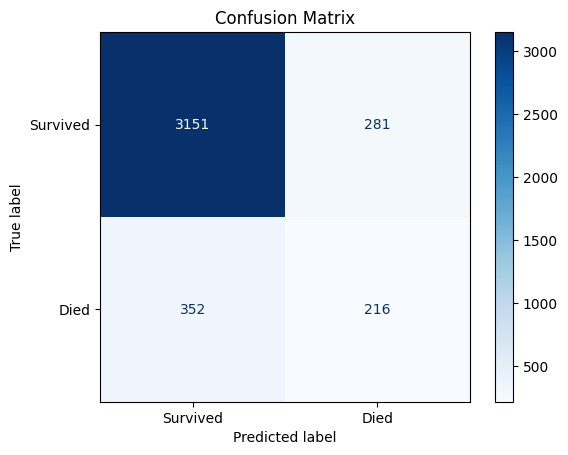

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRFClassifier



# smote_tomek = SMOTETomek(random_state=0)
# X_resampled, y_resampled = smote_tomek.fit_resample(imputed_df, Mortality_labels)


adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(imputed_df, Mortality_labels)



# smote = SMOTE(sampling_strategy='minority', random_state=0) 
# X_resampled, y_resampled = smote.fit_resample(imputed_df, Mortality_labels)



test_path = '../data/dataset/set-b'
test_label_path = '../data/dataset/Outcomes-b.txt'

test_files = [f for f in os.listdir(test_path) if f.endswith(".txt")]
test_files.sort()

test_patient_data =[]
test_patient_outcomes =[]

for i in enumerate(test_files):
    data_path = os.path.join(test_path, test_files[i[0]])
    test_patient_data.append( pd.read_csv(data_path))
test_df = rtd.raw_to_df(test_patient_data)
iterative_imp = IterativeImputer(random_state=0)
X = test_df.drop(columns=['RecordID'])  # drop ID from features
X_imputedbetter = iterative_imp.fit_transform(X)
test_df = pd.DataFrame(X_imputedbetter,columns = X.columns)



test_patient_outcomes = pd.read_csv(test_label_path)
test_Mortality_labels = test_patient_outcomes["In-hospital_death"]


model = RandomForestClassifier(n_estimators=100, class_weight='balanced')



model.fit(X_resampled,y_resampled)
predictions = model.predict(test_df)
cm = confusion_matrix(test_Mortality_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Died"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()






# model = DecisionTreeClassifier()
# model.fit(X_train,y_train)

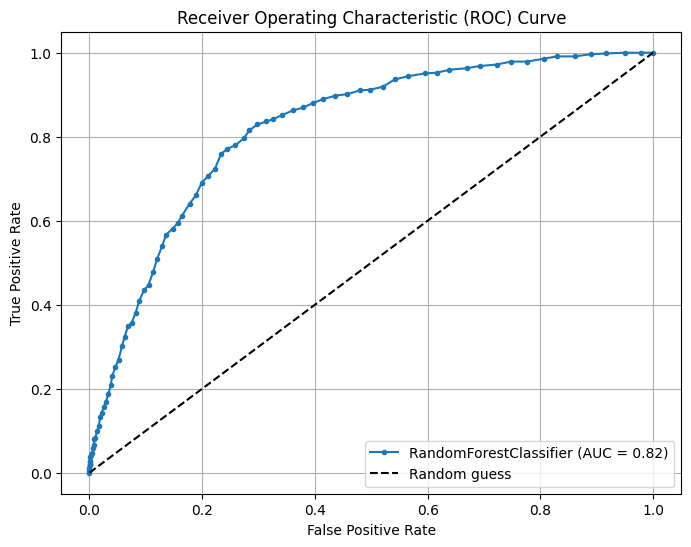

Random Forest Classifier: ROC AUC = 0.822


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

probs = model.predict_proba(test_df)[:, 1]

fpr, tpr, thresholds = roc_curve(test_Mortality_labels, probs)

auc_score = roc_auc_score(test_Mortality_labels, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'RandomForestClassifier (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'Random Forest Classifier: ROC AUC = {auc_score:.3f}')

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X_imputedbetter, Mortality_labels, test_size=0.2, random_state=42)

# model = DecisionTreeClassifier()
# model.fit(X_train,y_train)
# predictions = model.predict(X_test)
# cm = confusion_matrix(y_test, predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Died"])
# disp.plot(cmap='Blues')
# plt.title("Confusion Matrix")
# plt.show()

### ROC AUC Score is is the area under the ROC curve. It sums up how well a model can produce relative scores to discriminate between positive or negative instances across all classification thresholds. The ROC AUC score ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates perfect performance.


##### Now let us plot all models imported


Evaluating Decision Tree...


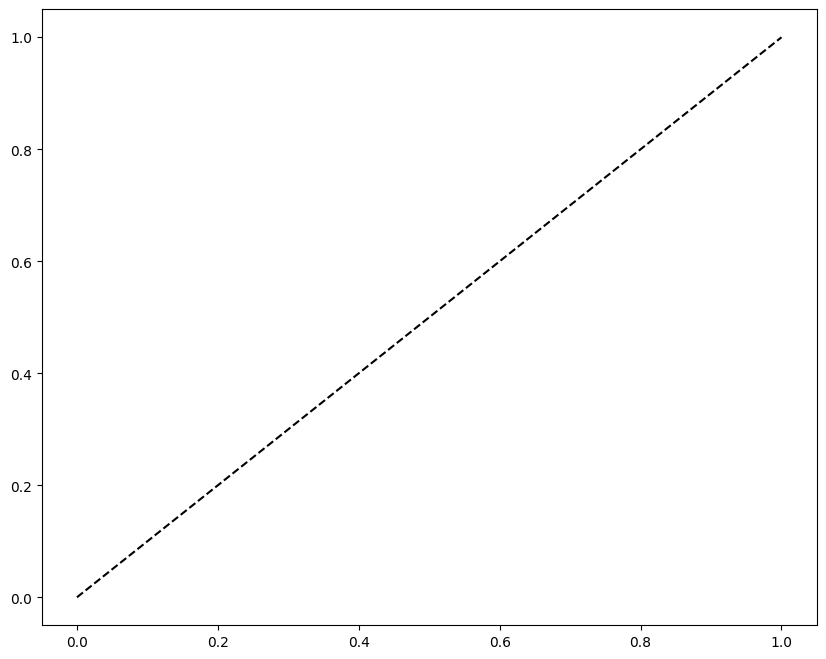

<Figure size 800x600 with 0 Axes>

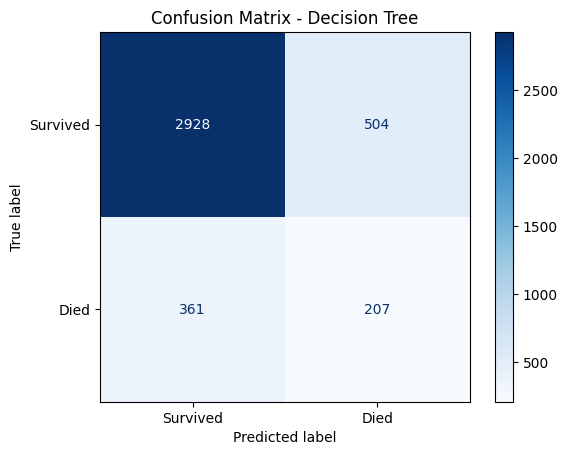

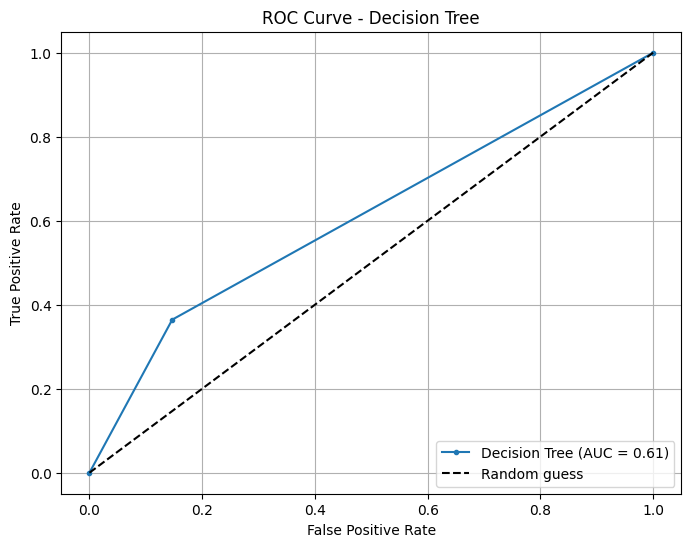

Decision Tree Metrics:
Accuracy: 0.784
Precision: 0.291
Recall: 0.364
F1 Score: 0.324
AUC: 0.609

Evaluating Random Forest...


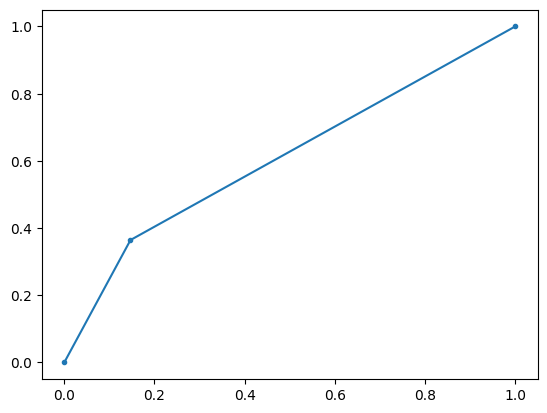

<Figure size 800x600 with 0 Axes>

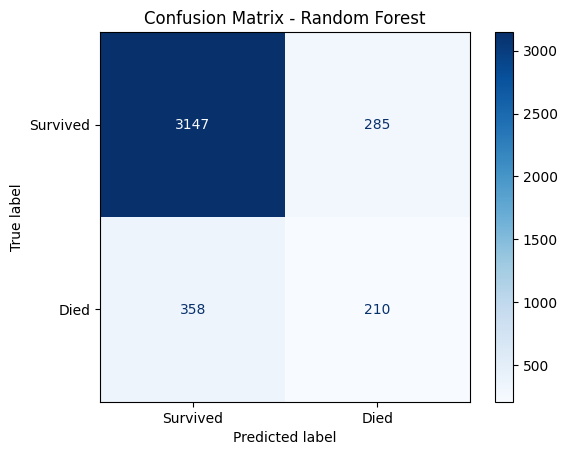

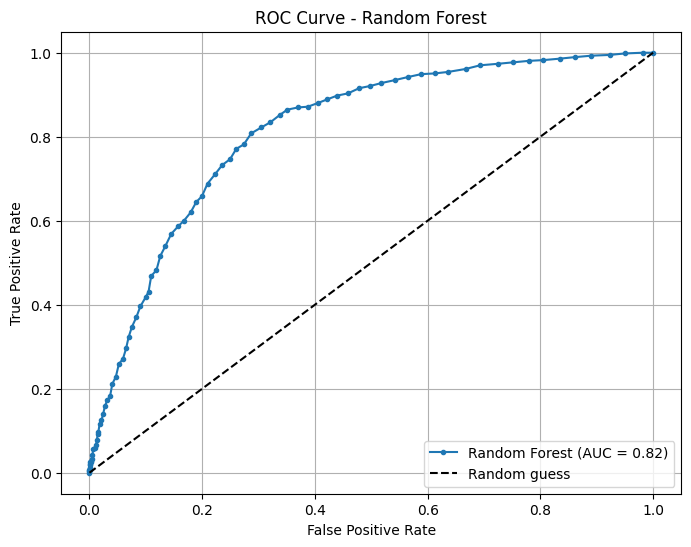

Random Forest Metrics:
Accuracy: 0.839
Precision: 0.424
Recall: 0.370
F1 Score: 0.395
AUC: 0.816

Evaluating Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


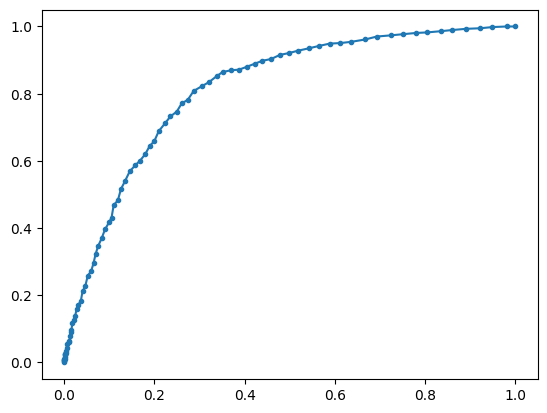

<Figure size 800x600 with 0 Axes>

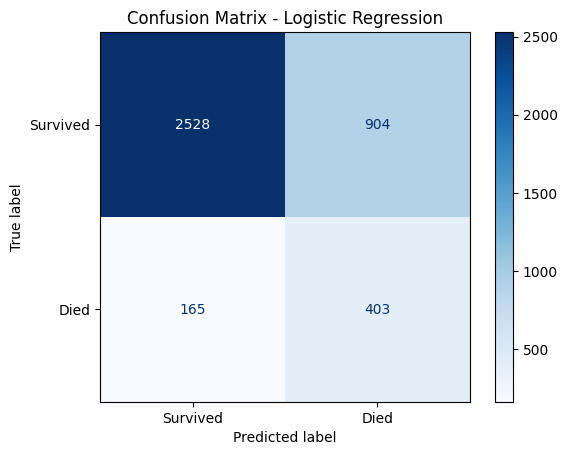

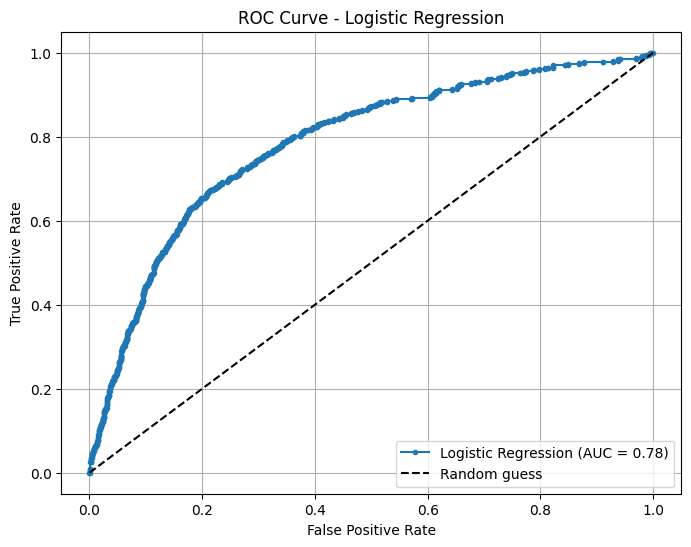

Logistic Regression Metrics:
Accuracy: 0.733
Precision: 0.308
Recall: 0.710
F1 Score: 0.430
AUC: 0.784

Evaluating SVM...


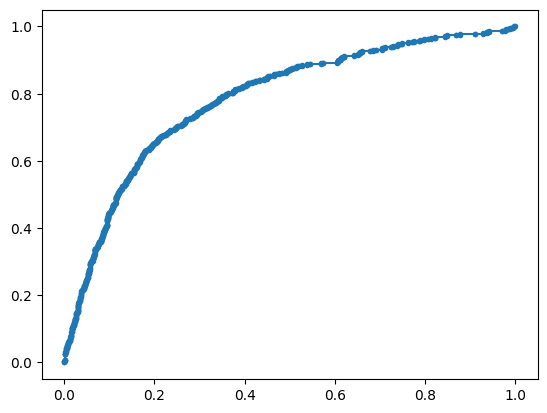

<Figure size 800x600 with 0 Axes>

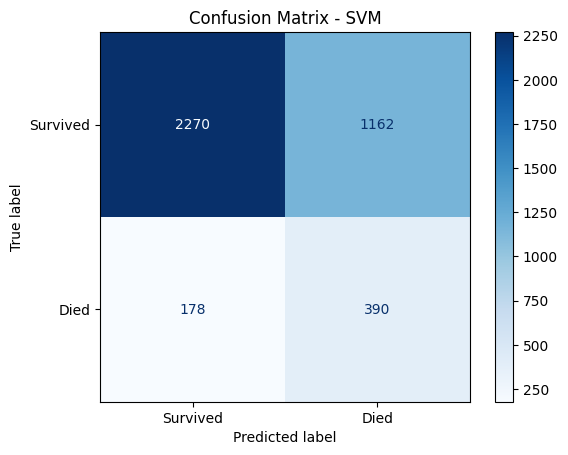

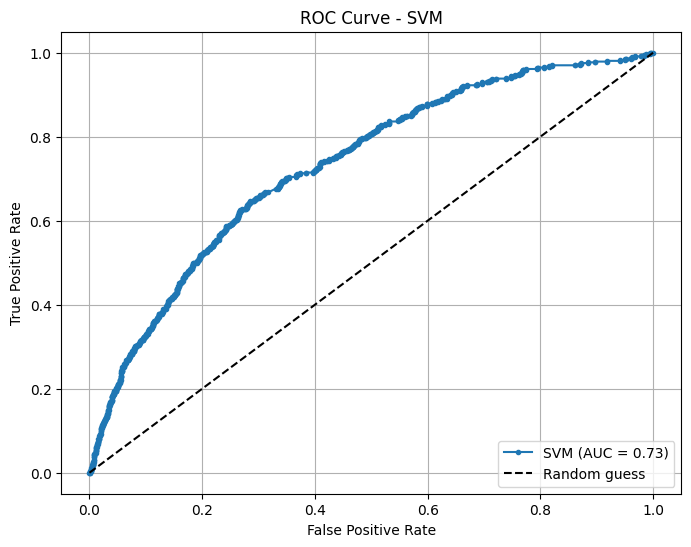

SVM Metrics:
Accuracy: 0.665
Precision: 0.251
Recall: 0.687
F1 Score: 0.368
AUC: 0.732

Evaluating KNN...


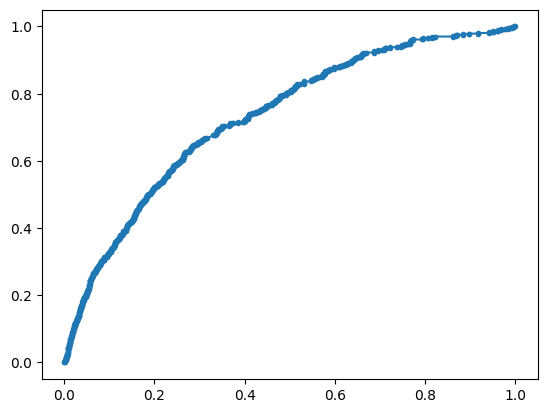

<Figure size 800x600 with 0 Axes>

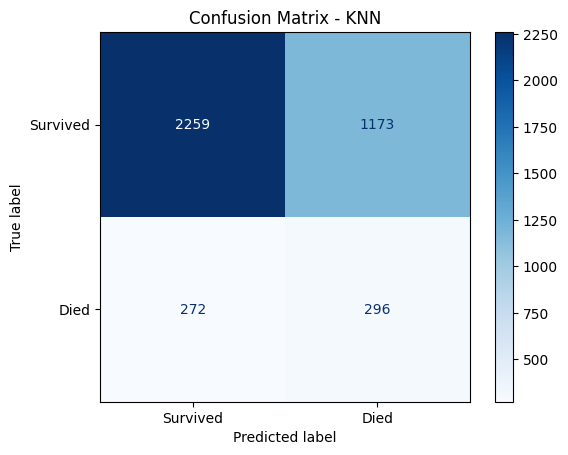

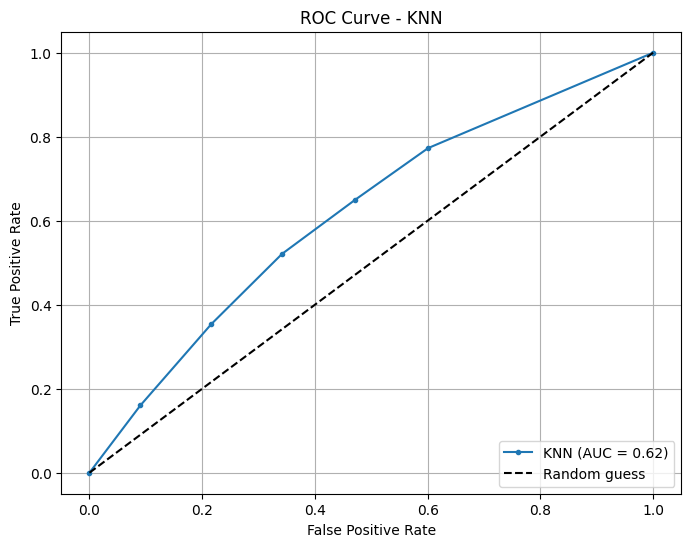

KNN Metrics:
Accuracy: 0.639
Precision: 0.201
Recall: 0.521
F1 Score: 0.291
AUC: 0.616

Evaluating XGBoost RF...


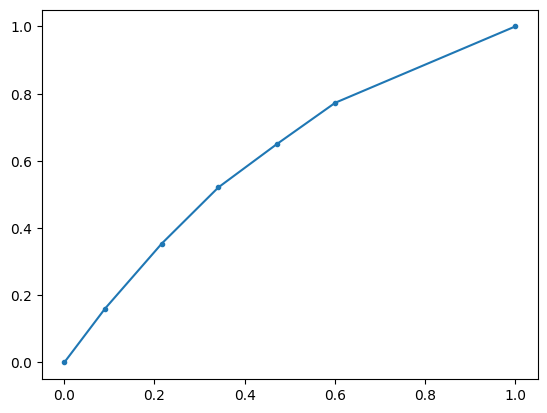

<Figure size 800x600 with 0 Axes>

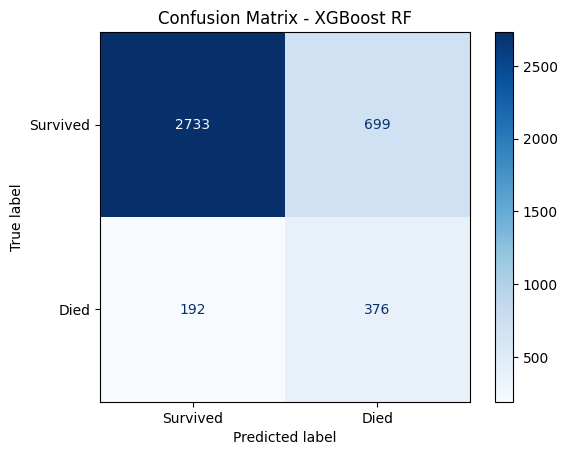

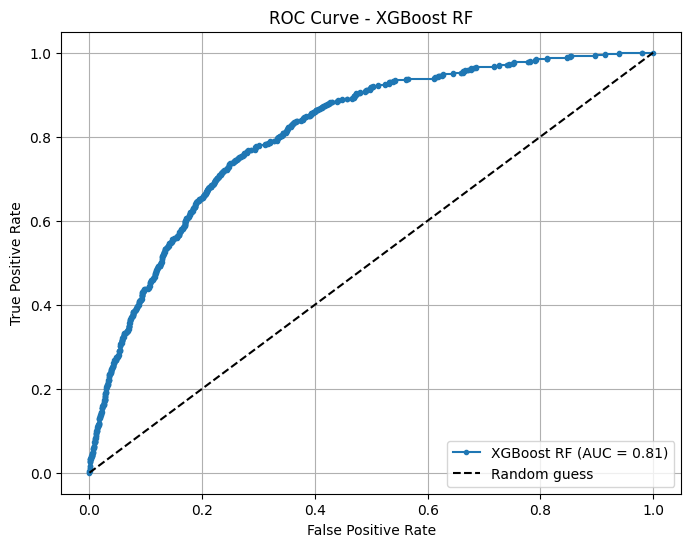

XGBoost RF Metrics:
Accuracy: 0.777
Precision: 0.350
Recall: 0.662
F1 Score: 0.458
AUC: 0.810

Summary of AUC Scores:
Random Forest: 0.816
XGBoost RF: 0.810
Logistic Regression: 0.784
SVM: 0.732
KNN: 0.616
Decision Tree: 0.609


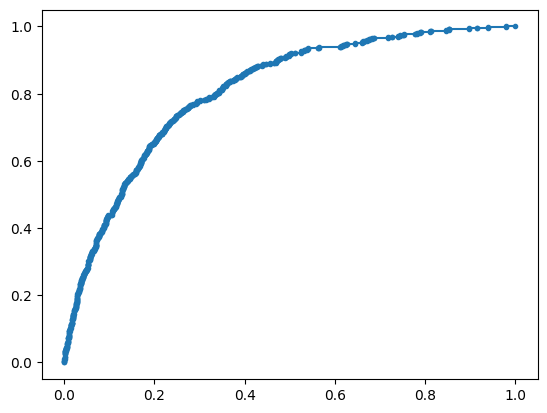

In [29]:
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "SVM": SVC(probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost RF": XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
}

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

auc_scores = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    model.fit(X_resampled, y_resampled)
    
    predictions = model.predict(test_df)
    
    cm = confusion_matrix(test_Mortality_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Died"])
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    probs = model.predict_proba(test_df)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_Mortality_labels, probs)
    auc_score = roc_auc_score(test_Mortality_labels, probs)
    auc_scores[name] = auc_score
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    plt.figure(1)
    plt.plot(fpr, tpr, marker='.', label=f'{name} (AUC = {auc_score:.2f})')
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"AUC: {auc_score:.3f}")


print("\nSummary of AUC Scores:")
for name, score in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.3f}")


In [30]:
import pandas as pd

### Training for the risk factor

### A problem with the current dataset is that the outputs-a.txt is not labelled, so we will do that now

In [31]:
with open("../data/dataset/outputs-a.txt", 'r+') as f:
    lines = f.readlines()
    if lines and lines[0][0].isdigit():
        f.seek(0)
        f.write("RecordID,Mortality,risk\n" + ''.join(lines))

In [32]:
df3= pd.read_csv("../data/dataset/outputs-a.txt")
df3
risk_label_A = df3[df3.columns[2]]
risk_label_A

0       0.1
1       0.1
2       0.3
3       0.1
4       0.1
       ... 
3995    0.2
3996    0.1
3997    0.1
3998    0.3
3999    0.4
Name: risk, Length: 4000, dtype: float64

### Perfect, now we have an array called ***risk_label_A*** that stores the risk factors, which we will use to train our model and examine the accuracy via cross validation

In [35]:
imputed_df

,Age,Gender,ICUType,Height,Albumin,ALP,ALT,AST,Bilirubin,BUN,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight
0,54.0,0.0,4.0,163.668902,3.961680,154.773539,598.834796,476.512564,0.016227,21.0,...,185.0,732.000000,103.834454,5684.038965,37.8,12.079728,0.716987,6500.0,20.6,83.012773
1,76.0,1.0,2.0,175.300000,3.939696,106.232482,455.246726,692.252659,4.020247,55.0,...,135.0,1051.789167,581.000000,7712.000000,37.1,17.638824,3.199689,6214.0,33.8,81.600000
2,44.0,0.0,3.0,168.369735,5.000000,232.000000,166.000000,399.000000,5.800000,14.0,...,113.0,984.985330,95.000000,2011.000000,37.2,14.382198,3.539032,5123.0,14.1,56.700000
3,68.0,1.0,3.0,180.300000,4.400000,105.000000,12.000000,15.000000,0.200000,53.0,...,284.0,912.000000,254.603513,5313.180882,37.0,21.242461,3.942909,3275.0,28.2,84.600000
4,88.0,0.0,3.0,160.878669,3.300000,173.698635,334.604274,399.471770,2.723443,70.0,...,97.0,920.000000,155.059101,6372.716583,36.7,7.144611,0.824911,2361.0,8.6,72.748800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,70.0,0.0,4.0,161.581744,3.858926,242.882610,649.673794,838.472339,0.622815,32.0,...,218.0,1110.889497,175.655009,6096.000000,36.9,13.535798,1.629077,1980.0,29.0,87.000000
3996,25.0,1.0,3.0,182.030979,5.132360,66.658414,2026.138200,1737.386346,10.143068,22.0,...,118.0,388.000000,148.190055,5644.360427,36.8,-6.465994,4.839879,4675.0,14.2,166.400000
3997,44.0,1.0,3.0,179.889113,3.731220,51.000000,20.000000,20.000000,0.500000,31.0,...,229.0,1097.658468,154.711794,754.000000,38.4,16.485779,5.943870,4193.0,33.2,109.000000
3998,37.0,1.0,3.0,170.329254,3.100000,507.000000,5913.000000,5056.000000,2.200000,357.0,...,314.0,743.837868,248.327899,8664.000000,37.4,-47.573274,1.767560,146.0,52.1,87.400000


In [ ]:
df3

,RecordID,Mortality,risk
0,132539,0,0.1
1,132540,0,0.1
2,132541,1,0.3
3,132543,0,0.1
4,132545,0,0.1
...,...,...,...
3995,142665,0,0.2
3996,142667,0,0.1
3997,142670,0,0.1
3998,142671,1,0.3


In [ ]:
from sklearn.model_selection import train_test_split
X = imputed_df
Y = df3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train